In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.Category.value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

We have an imbalanced dataset. We will use it as it is for now. We will try to balance it later.

In [4]:
df["spam"] = df["Category"].apply(lambda x: 1 if x=="spam" else 0)

In [5]:
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.Message, df.spam, test_size=0.2, random_state=0)

In [7]:
X_train.shape

(4457,)

In [8]:
X_test.shape

(1115,)

In [9]:
type(X_train)

pandas.core.series.Series

In [10]:
X_train.head()

1114    No I'm good for the movie, is it ok if I leave...
3589    If you were/are free i can give. Otherwise nal...
3095    Have you emigrated or something? Ok maybe 5.30...
1012          I just got home babe, are you still awake ?
3320                      Kay... Since we are out already
Name: Message, dtype: object

In [11]:
type(y_train)

pandas.core.series.Series

In [12]:
y_train.head()

1114    0
3589    0
3095    0
1012    0
3320    0
Name: spam, dtype: int64

In [13]:
type(X_train.values)

numpy.ndarray

Bag of Words Model:

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

X_train_cv = v.fit_transform(X_train.values)
X_train_cv

<4457x7788 sparse matrix of type '<class 'numpy.int64'>'
	with 59003 stored elements in Compressed Sparse Row format>

In [24]:
X_test_cv = v.transform(X_test)
X_test_cv

<1115x7788 sparse matrix of type '<class 'numpy.int64'>'
	with 14113 stored elements in Compressed Sparse Row format>

In [15]:
X_train_cv.shape

(4457, 7788)

In [19]:
features = v.get_feature_names_out()
features[1000:1010]

array(['anythingtomorrow', 'anytime', 'anyway', 'anyways', 'anywhere',
       'aom', 'apart', 'apartment', 'apes', 'aphex'], dtype=object)

In [22]:
v.vocabulary_

{'no': 4809,
 'good': 3196,
 'for': 2943,
 'the': 6861,
 'movie': 4623,
 'is': 3769,
 'it': 3781,
 'ok': 4932,
 'if': 3615,
 'leave': 4084,
 'in': 3661,
 'an': 957,
 'hourish': 3529,
 'you': 7751,
 'were': 7502,
 'are': 1048,
 'free': 2990,
 'can': 1625,
 'give': 3158,
 'otherwise': 5021,
 'nalla': 4696,
 'adi': 816,
 'entey': 2603,
 'nattil': 4716,
 'kittum': 3977,
 'have': 3369,
 'emigrated': 2570,
 'or': 4993,
 'something': 6351,
 'maybe': 4423,
 '30': 432,
 'was': 7429,
 'bit': 1359,
 'hopeful': 3505,
 'just': 3899,
 'got': 3213,
 'home': 3485,
 'babe': 1191,
 'still': 6524,
 'awake': 1169,
 'kay': 3926,
 'since': 6213,
 'we': 7455,
 'out': 5028,
 'already': 924,
 'me': 4428,
 'not': 4845,
 'workin': 7637,
 'once': 4954,
 'get': 3132,
 'job': 3852,
 'what': 7515,
 'he': 3379,
 'said': 5915,
 'matter': 4412,
 'my': 4679,
 'mind': 4505,
 'saying': 5963,
 'some': 6341,
 'other': 5019,
 'there': 6880,
 'oh': 4927,
 'yeah': 7723,
 'and': 961,
 'diet': 2305,
 'flew': 2891,
 'window': 756

In [25]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_cv, y_train)

MultinomialNB()

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       955
           1       0.98      0.93      0.95       160

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



Text(95.72222222222221, 0.5, 'Actual')

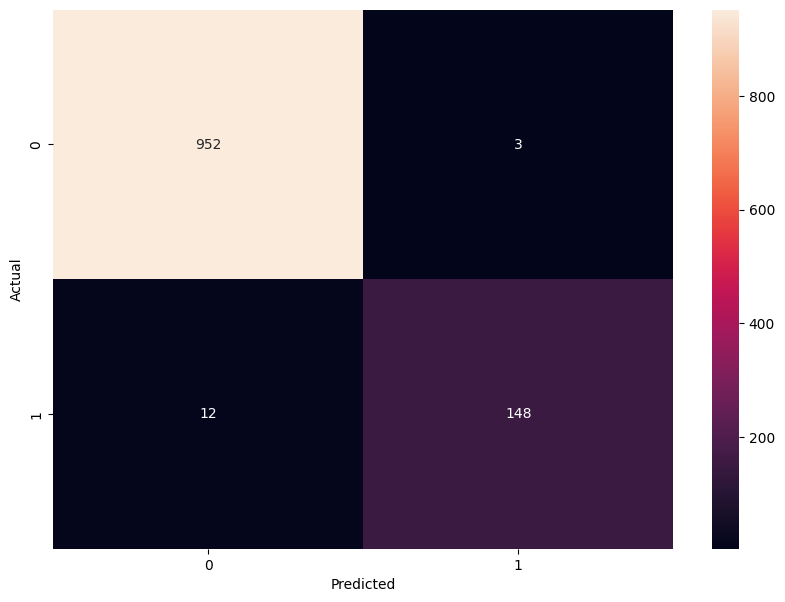

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test_cv)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")

Inference:

In [28]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]

emails_count = v.transform(emails)
preds = model.predict(emails_count)
print()

[0 1]


Training using the Pipeline:

In [29]:
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [30]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [31]:
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       955
           1       0.98      0.93      0.95       160

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115

